## ML DA2 AND DA3 - REGRESSION ANALYSIS

##### TEAMMATES

#### K K Shivaram 21BCE6171
#### Chanakya B M 21BCE1010
#### Adithya 21BCE5980
#### Mirudhula 21BCE5956

### Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE


df = pd.read_csv("ufc-fighters-statistics.csv")


## Step 1: Missing Value Analysis

In [2]:
#Dropped Name and Nickname
df.drop(columns=['nickname', 'name'], inplace=True)
missing_values = df.isnull().sum()
print(missing_values)

wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64


In [3]:
object_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

for col in object_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)


for col in numeric_columns:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

df.head(20)

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,7,0,0,190.50,92.99,181.808874,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,15,37,0,185.42,83.91,181.808874,Orthodox,1987-01-21,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,13,9,0,177.80,97.98,181.808874,Orthodox,1987-01-21,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,7,4,0,167.64,61.23,181.808874,Orthodox,1987-01-21,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,8,2,0,190.50,83.91,193.040000,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
5,9,7,0,175.26,70.31,181.808874,Orthodox,1979-03-01,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4
6,5,7,1,177.80,70.31,181.808874,Orthodox,1987-01-21,4.84,50.0,0.97,80.0,0.00,0.0,66.0,14.5
7,4,7,0,182.88,83.91,181.808874,Orthodox,1987-01-21,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4
8,9,3,0,177.80,70.31,175.260000,Orthodox,1982-10-21,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3
9,12,8,1,198.12,120.20,181.808874,Orthodox,1971-01-18,0.00,0.0,0.00,0.0,0.00,0.0,100.0,14.3


### Created Another Column for output 'win_rate'

In [4]:
df['win_rate'] = df['wins'] / (df['wins'] + df['losses'] + df['draws'])
#There is still a possibility to get NaN values if wins=0, loses=0, draws=0
df['win_rate'] = df['win_rate'].fillna(0)

df.head(20)

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,win_rate
0,7,0,0,190.50,92.99,181.808874,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,1.000000
1,15,37,0,185.42,83.91,181.808874,Orthodox,1987-01-21,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6,0.288462
2,13,9,0,177.80,97.98,181.808874,Orthodox,1987-01-21,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9,0.590909
3,7,4,0,167.64,61.23,181.808874,Orthodox,1987-01-21,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9,0.636364
4,8,2,0,190.50,83.91,193.040000,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,0.800000
5,9,7,0,175.26,70.31,181.808874,Orthodox,1979-03-01,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4,0.562500
6,5,7,1,177.80,70.31,181.808874,Orthodox,1987-01-21,4.84,50.0,0.97,80.0,0.00,0.0,66.0,14.5,0.384615
7,4,7,0,182.88,83.91,181.808874,Orthodox,1987-01-21,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4,0.363636
8,9,3,0,177.80,70.31,175.260000,Orthodox,1982-10-21,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3,0.750000
9,12,8,1,198.12,120.20,181.808874,Orthodox,1971-01-18,0.00,0.0,0.00,0.0,0.00,0.0,100.0,14.3,0.571429


## Step 2: Encoding

In [5]:
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

### Splitting independent and dependent Variables

In [6]:
df = df.drop(columns=['wins', 'losses', 'draws'], axis=1)
X = df.drop('win_rate', axis=1)
y = df['win_rate']

## Step3: Normalisation

In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print("Normalized Features:")
X

Normalized Features:


array([[0.51724138, 0.15037793, 0.52224218, ..., 1.        , 0.        ,
        1.        ],
       [0.44827586, 0.12027583, 0.52224218, ..., 0.        , 1.        ,
        0.98630137],
       [0.34482759, 0.16692083, 0.52224218, ..., 0.        , 0.        ,
        0.9543379 ],
       ...,
       [0.37931034, 0.0977324 , 0.52224218, ..., 0.        , 1.        ,
        0.        ],
       [0.51724138, 0.12027583, 0.96153846, ..., 0.        , 0.        ,
        0.        ],
       [0.13793103, 0.0150179 , 0.23076923, ..., 0.18      , 0.        ,
        0.        ]])

## Step 4: Outlier Analysis

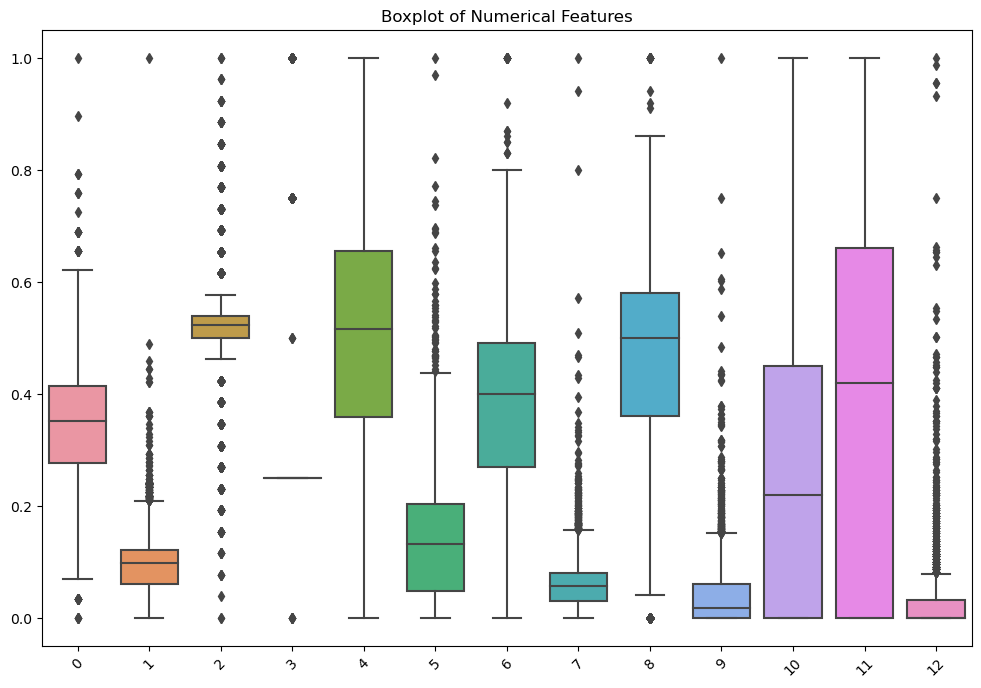

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

#### The above boxplot suggests there are outliers in several of the numerical features.  This is because the whiskers extend well beyond the upper and lower quartiles.

## Step 5: Linearity Analysis

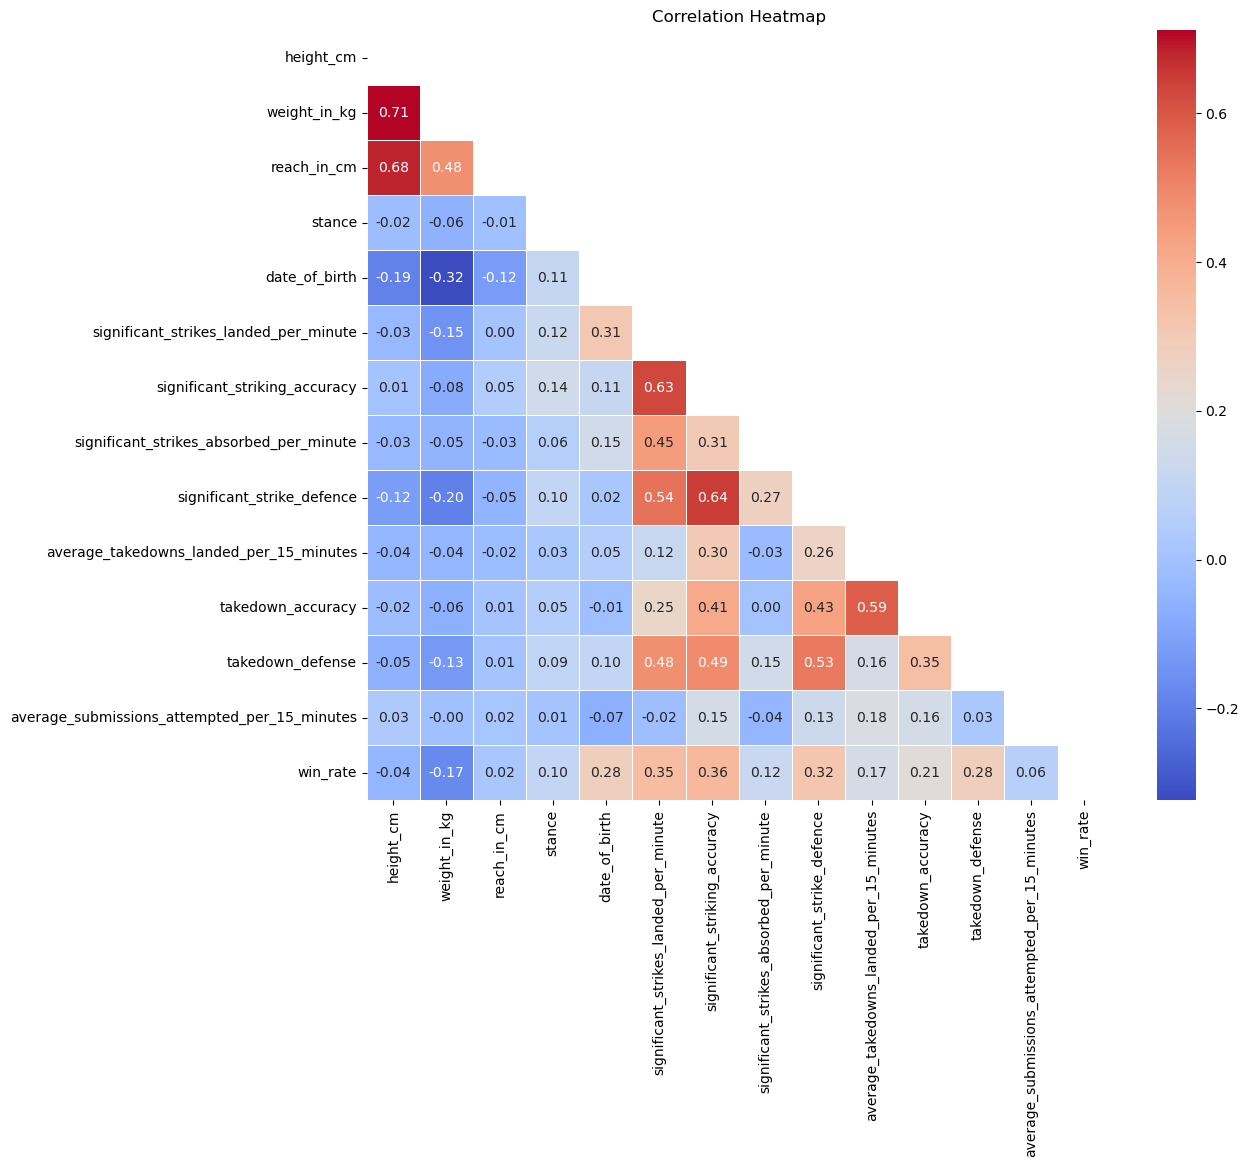

In [9]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Learnings from HeatMap


*   Height and reach are positively correlated
*   Weight and reach are also positively correlated
*   Date of birth doesn't appear to have a strong correlation with any of the other variables
*   Stance doesn't appear to have a strong correlation with any of the other variables





#### Scatter Plot

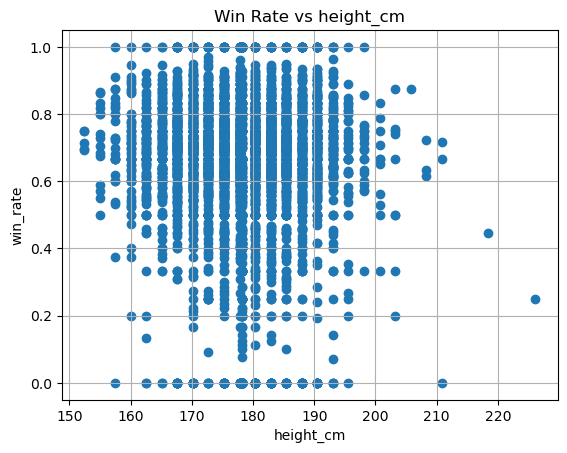

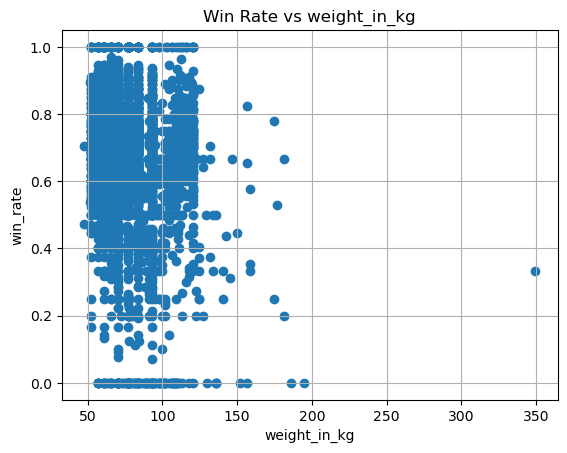

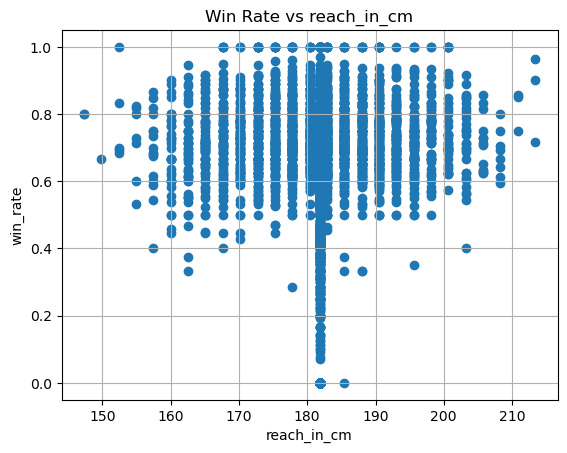

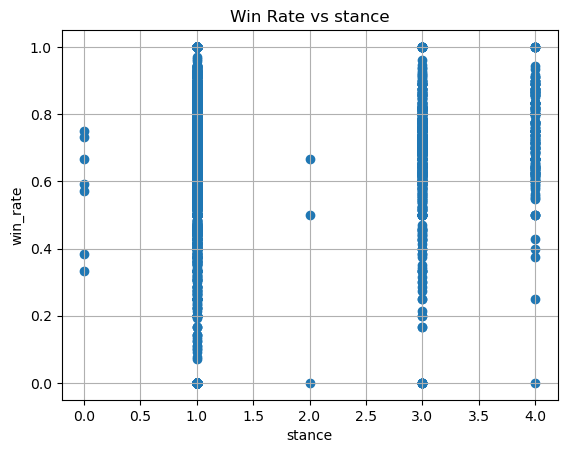

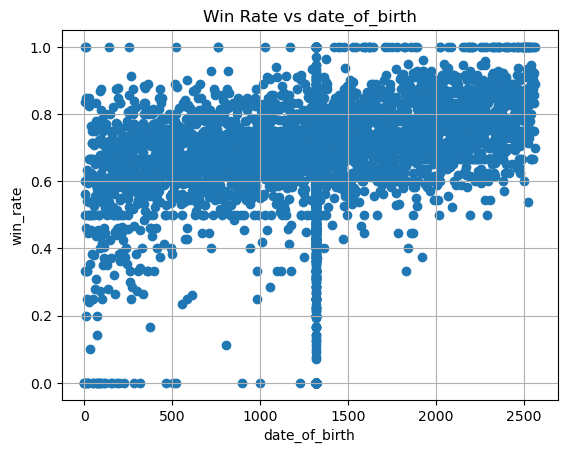

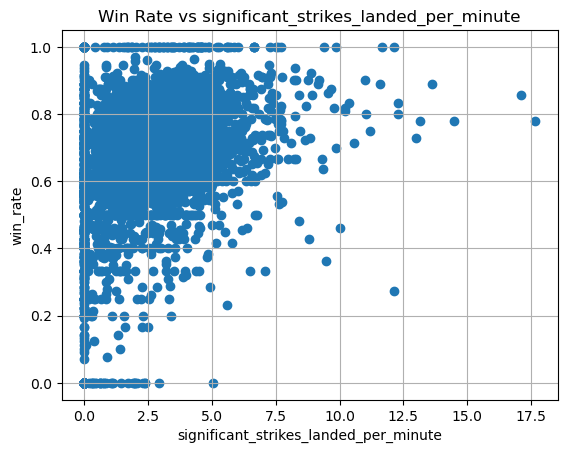

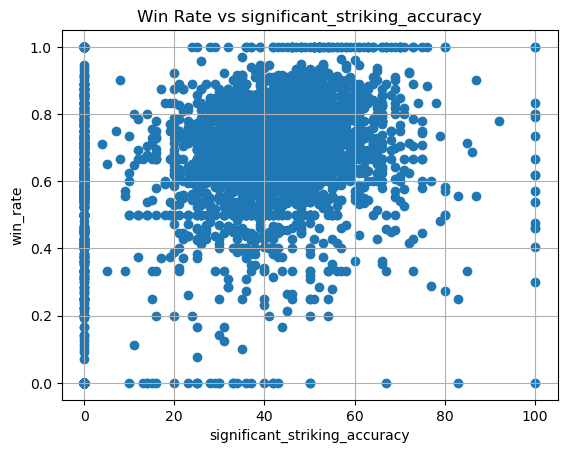

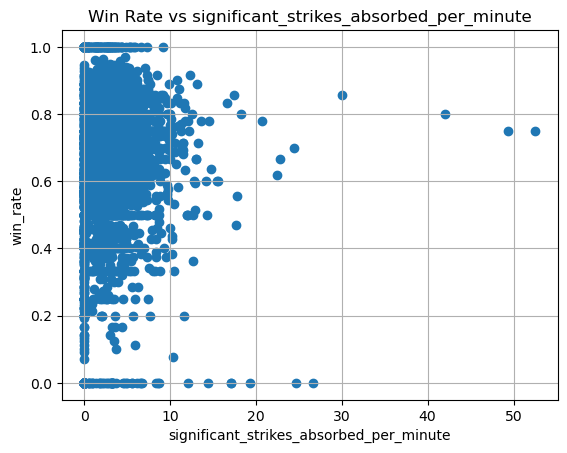

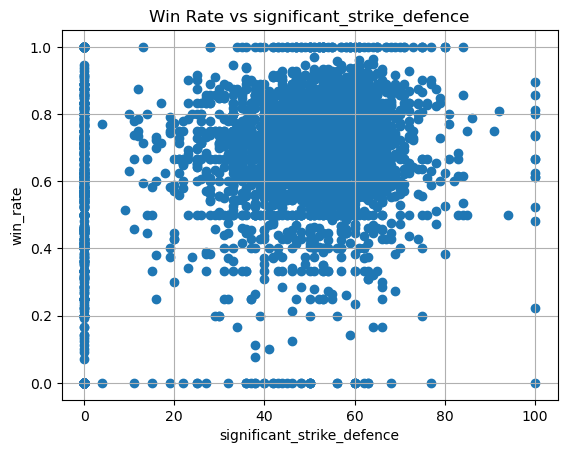

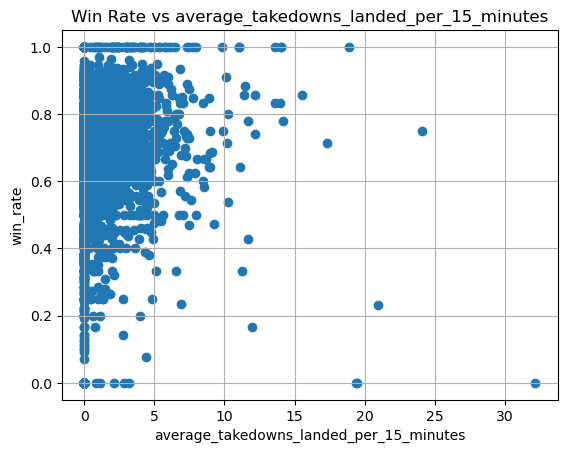

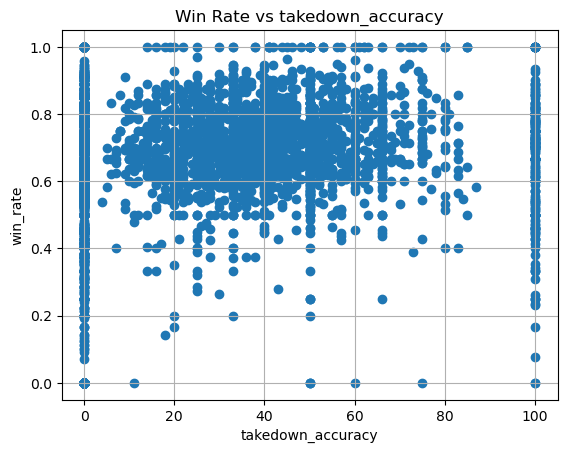

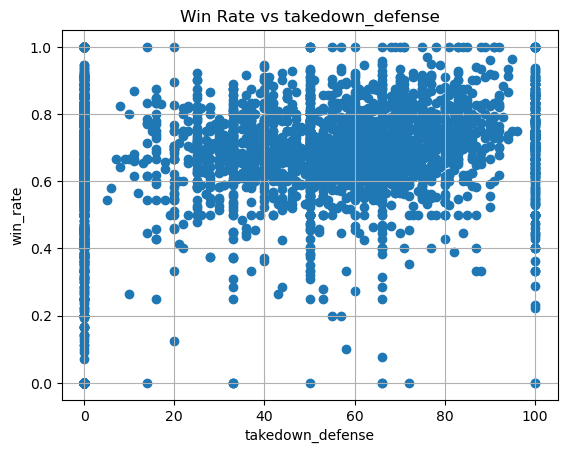

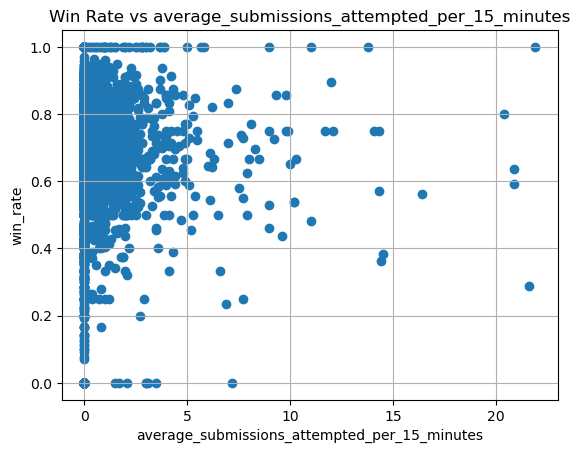

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

target_column = 'win_rate'  # Change this to your target column name

for col in df.columns:
  if col != target_column:
    plt.scatter(df[col], df[target_column])
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.title(f"Win Rate vs {col}")
    plt.grid(True)
    plt.show()
    plt.clf()  # Clear plot for next iteration

### Based on the Above plots and Correlation Matrix, it can be concluded that the given dataset is non linear

### Split the data into training and test sets



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Two Algorithms

### Support Vector Regression (SVR)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model
svr = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for SVR

# Train the SVR model
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
svr_rmse =np.sqrt(mean_squared_error(y_test, y_pred))
svr_r2 = r2_score(y_test, y_pred)
print(f"SVR RMSE: {svr_rmse}")
print(f"SVR R^2 Score: {svr_r2}")



SVR RMSE: 0.17485596183464447
SVR R^2 Score: 0.21021393672404165


# polynomial regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression RMSE:", rmse_poly)
print("Polynomial Regression R2 Score:", r2_poly)

Polynomial Regression RMSE: 0.17137666079033695
Polynomial Regression R2 Score: 0.24133171412243926


/Users/shivaram/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### AdaBoost

In [14]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost_regressor = AdaBoostRegressor(n_estimators=200, random_state=42)
ada_boost_regressor.fit(X_train, y_train)

y_pred = ada_boost_regressor.predict(X_test)

ada_boost_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ada_boost_r2 = r2_score(y_test, y_pred)

print(f"AdaBoost RMSE: {ada_boost_rmse}")
print(f"AdaBoost R^2 Score: {ada_boost_r2}")

AdaBoost RMSE: 0.17119544202029913
AdaBoost R^2 Score: 0.24293534255905436


# Ensemble

In [15]:
voting_regressor = VotingRegressor(estimators=[('SVR', svr), ('polynomial', poly_reg)])
voting_regressor.fit(X_train, y_train)
y_pred_voting = voting_regressor.predict(X_test)
rmse_voting = mean_squared_error(y_test, y_pred_voting, squared=False)
r2_voting = r2_score(y_test, y_pred_voting)
print("Voting Regressor RMSE:", rmse_voting)
print("Voting Regressor R2 Score:", r2_voting)

Voting Regressor RMSE: 0.17001600983118184
Voting Regressor R2 Score: 0.25333083703445036


/Users/shivaram/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Plotting

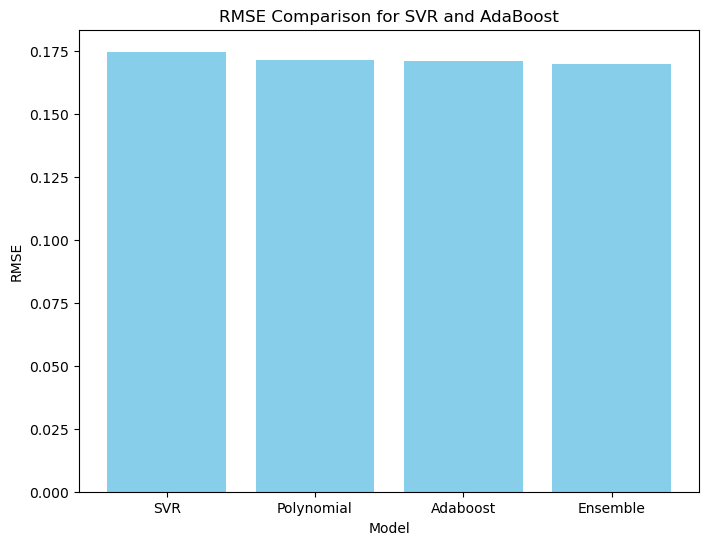

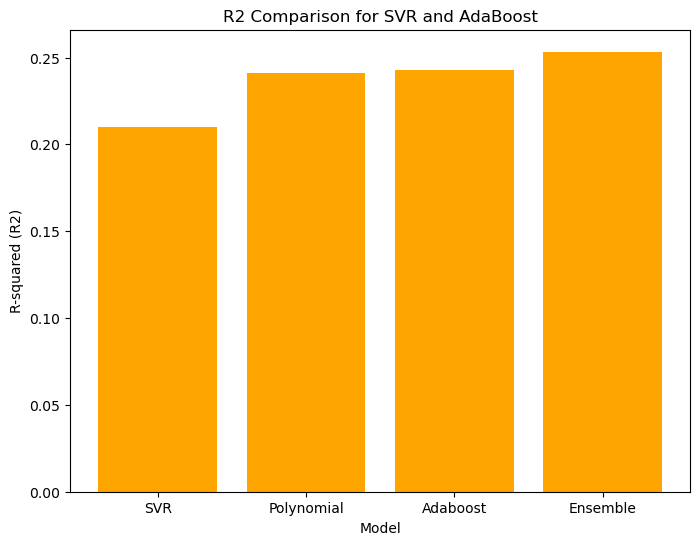

In [18]:
model_names = ['SVR','Polynomial','Adaboost', 'Ensemble']
rmse_values = [svr_rmse, rmse_poly, ada_boost_rmse, rmse_voting]
r2_values = [svr_r2, r2_poly, ada_boost_r2, r2_voting]

# Plot RMSE values
plt.figure(figsize=(8, 6))
plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for SVR and AdaBoost')
plt.show()

# Plot R2 values
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_values, color='orange')
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('R2 Comparison for SVR and AdaBoost')
plt.show()

## Ensemble model performs better than oteher models because it is combining the power of two other models of SVR and Polynomial regression!